In [1]:
import tensorflow as tf 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
tf.__version__ 

'2.3.0'

In [3]:
(train_image, train_label), (test_image, test_label) = tf.keras.datasets.fashion_mnist.load_data()

In [4]:
train_image.shape

(60000, 28, 28)

In [5]:
test_image.shape, test_label.shape

((10000, 28, 28), (10000,))

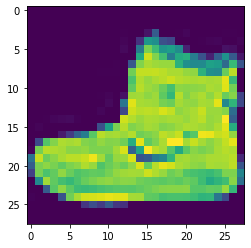

In [6]:
plt.imshow(train_image[0])

In [7]:
train_label

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
train_image = train_image/255
test_image = test_image/255 

In [9]:
train_label

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
train_label_onehot = tf.keras.utils.to_categorical(train_label)

In [11]:
train_label_onehot[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [12]:
test_label_onehot = tf.keras.utils.to_categorical(test_label)

In [13]:
model_onehot = tf.keras.Sequential()
model_onehot.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model_onehot.add(tf.keras.layers.Dense(128, activation='relu'))
model_onehot.add(tf.keras.layers.Dense(128, activation='relu'))
model_onehot.add(tf.keras.layers.Dense(128, activation='relu'))
model_onehot.add(tf.keras.layers.Dense(10,activation='softmax'))

In [14]:
model_onehot.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


In [15]:
model_onehot.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss='categorical_crossentropy',
             metrics=['acc'])

In [16]:
history = model_onehot.fit(train_image, train_label_onehot, 
                           epochs=10,
                          validation_data=(test_image, test_label_onehot))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4910 - acc: 0.8225 - val_loss: 0.4259 - val_acc: 0.8477
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3650 - acc: 0.8654 - val_loss: 0.3771 - val_acc: 0.8645
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3297 - acc: 0.8785 - val_loss: 0.3621 - val_acc: 0.8673
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3058 - acc: 0.8865 - val_loss: 0.3676 - val_acc: 0.8711
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2914 - acc: 0.8905 - val_loss: 0.3309 - val_acc: 0.8793
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2761 - acc: 0.8965 - val_loss: 0.3451 - val_acc: 0.8754
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2633 - acc: 0.9014 - val_loss: 0.3551 - val_acc: 0.8735
Epoch 8/10
1875/1875 [==============================] - 3s 2ms

In [17]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

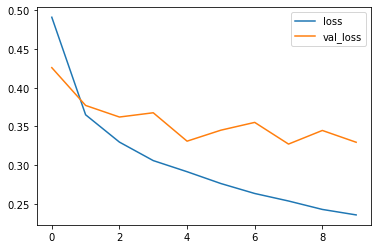

In [18]:
plt.plot(history.epoch, history.history.get('loss'), label = 'loss')
plt.plot(history.epoch, history.history.get('val_loss'), label = 'val_loss')
plt.legend()

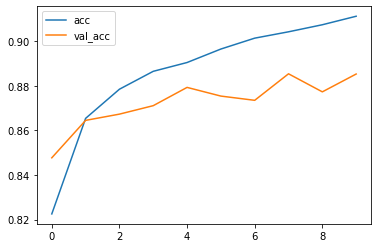

In [19]:
plt.plot(history.epoch, history.history.get('acc'), label = 'acc')
plt.plot(history.epoch, history.history.get('val_acc'), label = 'val_acc')
plt.legend()